### utils

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ee
import numpy as np
from datetime import timedelta
import seaborn as sns
import re
from matplotlib import font_manager

/home/khs/anaconda3/envs/hoso/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
# 버전 체크
import torch
print(torch.__version__)
print(torch.version.cuda)

2.5.1.post303
11.8


### io

In [3]:
# data
df = pd.read_csv("/home/khs/data/csv/matching data/chla_sentinel2_trans.csv")
print(len(df))
df

881


,분류번호,측정소명,년/월/일,회차,경도,위도,채수시각,수심(m),수온(℃),클로로필 a(㎎/㎥),...,B4,B5,B6,B7,B8,B8A,B9,SCL,idx,image_id_S2
0,5003B20,나주댐1,2018/02/22,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,NaN,2.9,9.3,...,245.0,239.0,225.0,243.0,249.0,220.0,195.0,6.0,963,20180222T021709_20180222T021703_T52SBD
1,5003B10,나주댐2,2018/02/22,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:23,NaN,3.7,8.3,...,511.0,629.0,590.0,628.0,712.0,556.0,473.0,6.0,964,20180222T021709_20180222T021703_T52SBD
2,5003B20,나주댐1,2018/02/22,1회차 중층부,"126°51'36""","34°57'22.39""",11:15,NaN,3.6,8.6,...,245.0,239.0,225.0,243.0,249.0,220.0,195.0,6.0,967,20180222T021709_20180222T021703_T52SBD
3,5003B20,나주댐1,2018/02/22,1회차 하층부,"126°51'36""","34°57'22.39""",11:11,NaN,3.6,8.2,...,245.0,239.0,225.0,243.0,249.0,220.0,195.0,6.0,969,20180222T021709_20180222T021703_T52SBD
4,2018B30,남강댐1(진양호),2018/10/15,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,40.98,17.7,4.5,...,832.0,645.0,172.0,154.0,125.0,79.0,0.0,6.0,5034,20181015T021641_20181015T022428_T52SDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,4007B70,주암댐1,2025/10/28,3회차 상층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,21.2,6.0,...,76.0,66.0,51.0,52.0,49.0,62.0,69.0,6.0,38663,20251028T021821_20251028T022504_T52SCD
877,4007B70,주암댐1,2025/10/28,3회차 중층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,20.0,5.8,...,76.0,66.0,51.0,52.0,49.0,62.0,69.0,6.0,38664,20251028T021821_20251028T022504_T52SCD
878,4007B70,주암댐1,2025/10/28,3회차 하층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,12.7,0.4,...,76.0,66.0,51.0,52.0,49.0,62.0,69.0,6.0,38665,20251028T021821_20251028T022504_T52SCD
879,5001B40,광주댐1,2025/11/07,1회차,"126°59'9.6""","35°11'59.14""",13:57,NaN,18.5,5.3,...,217.0,157.0,75.0,58.0,78.0,61.0,35.0,6.0,38961,20251107T021911_20251107T022008_T52SCD


In [4]:
# unique stations list
unique_stations = df["측정소명"].unique().tolist()

print("측정소 리스트 (총 {}개):".format(len(unique_stations)))
print(unique_stations)

측정소 리스트 (총 80개):
['나주댐1', '나주댐2', '남강댐1(진양호)', '남강댐2(진양호)', '남강댐3(진양호)', '춘천댐1', '충주댐1', '장흥댐2', '장흥댐3', '장흥댐4', '주암댐1', '군위댐1', '군위댐2', '수어댐1', '주암조정지댐1(상사호)', '주암조정지댐3(상사호)', '보성강댐1', '보성강댐2', '장흥댐1', '장성댐1', '장성댐2', '화천댐1(파로호)', '괴산댐3', '대청댐4', '대청댐6', '합천댐1', '합천댐2', '대청댐1', '연초댐2', '주암댐2', '주암댐3', '김천부항댐', '부안댐1', '부안댐2', '부안댐3', '임하댐1', '임하댐2', '광동댐', '보령댐3', '소양강댐2', '소양강댐3', '보현산댐', '합천댐3', '광주댐1', '광주댐2', '대청댐3', '회야호1', '회야호2', '충주댐2', '충주댐3', '충주댐4', '구천댐', '화천댐2(파로호)', '화천댐3(파로호)', '충주조정지댐2', '달방댐', '영천댐1(영천호)', '청평댐2', '청평댐3', '가창댐1', '섬진강댐1(옥정호)', '의암댐1', '보령댐1', '보령댐2', '도암댐', '군남댐', '한탄강댐', '담양댐1', '담양댐2', '대청댐2', '연초댐1', '영천댐2(영천호)', '용담댐3', '팔당댐5', '팔당댐1', '팔당댐2', '팔당댐3', '팔당댐4', '청평댐1', '밀양댐1']


### preprocessing

In [5]:
# 회차번호 추출
df["회차번호"] = df["회차"].str.extract(r"(\d+)").astype(float)

# 같은 날짜·측정소에서 회차가 여러 개인 그룹 찾기
multi_mask = df.groupby(["측정소명", "년/월/일"])["회차번호"].transform("nunique") > 1
multi_df = df[multi_mask].sort_values(["측정소명", "년/월/일", "회차번호"])

print(f"같은 날짜·측정소에서 회차가 여러 개인 경우: {multi_df['측정소명'].nunique()}개 지점, 총 {len(multi_df)}행\n")
print(multi_df[["측정소명", "년/월/일", "회차"]].drop_duplicates().head(20))

# # 겹치는 것 삭제
# df = df.drop(index=1956)
print(len(df))

같은 날짜·측정소에서 회차가 여러 개인 경우: 0개 지점, 총 0행

Empty DataFrame
Columns: [측정소명, 년/월/일, 회차]
Index: []
881


층부

In [6]:
# 층부 count
df_work = df.copy()
df_work["층부"] = df_work["회차"].str.extract(r"([가-힣·]+층부)")
layer_counts = (df_work["층부"].fillna("미기재").value_counts())

print("층부별 개수")
print(layer_counts)
print("전체 행 수:", len(df_work))
df_work

층부별 개수
층부
상층부     306
중층부     281
하층부     281
미기재      11
중상층부      1
중하층부      1
Name: count, dtype: int64
전체 행 수: 881


,분류번호,측정소명,년/월/일,회차,경도,위도,채수시각,수심(m),수온(℃),클로로필 a(㎎/㎥),...,B6,B7,B8,B8A,B9,SCL,idx,image_id_S2,회차번호,층부
0,5003B20,나주댐1,2018/02/22,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,NaN,2.9,9.3,...,225.0,243.0,249.0,220.0,195.0,6.0,963,20180222T021709_20180222T021703_T52SBD,1.0,상층부
1,5003B10,나주댐2,2018/02/22,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:23,NaN,3.7,8.3,...,590.0,628.0,712.0,556.0,473.0,6.0,964,20180222T021709_20180222T021703_T52SBD,1.0,상층부
2,5003B20,나주댐1,2018/02/22,1회차 중층부,"126°51'36""","34°57'22.39""",11:15,NaN,3.6,8.6,...,225.0,243.0,249.0,220.0,195.0,6.0,967,20180222T021709_20180222T021703_T52SBD,1.0,중층부
3,5003B20,나주댐1,2018/02/22,1회차 하층부,"126°51'36""","34°57'22.39""",11:11,NaN,3.6,8.2,...,225.0,243.0,249.0,220.0,195.0,6.0,969,20180222T021709_20180222T021703_T52SBD,1.0,하층부
4,2018B30,남강댐1(진양호),2018/10/15,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,40.98,17.7,4.5,...,172.0,154.0,125.0,79.0,0.0,6.0,5034,20181015T021641_20181015T022428_T52SDD,1.0,상층부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,4007B70,주암댐1,2025/10/28,3회차 상층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,21.2,6.0,...,51.0,52.0,49.0,62.0,69.0,6.0,38663,20251028T021821_20251028T022504_T52SCD,3.0,상층부
877,4007B70,주암댐1,2025/10/28,3회차 중층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,20.0,5.8,...,51.0,52.0,49.0,62.0,69.0,6.0,38664,20251028T021821_20251028T022504_T52SCD,3.0,중층부
878,4007B70,주암댐1,2025/10/28,3회차 하층부,"127°14'26.74""","35°3'23.78""",10:10,NaN,12.7,0.4,...,51.0,52.0,49.0,62.0,69.0,6.0,38665,20251028T021821_20251028T022504_T52SCD,3.0,하층부
879,5001B40,광주댐1,2025/11/07,1회차,"126°59'9.6""","35°11'59.14""",13:57,NaN,18.5,5.3,...,75.0,58.0,78.0,61.0,35.0,6.0,38961,20251107T021911_20251107T022008_T52SCD,1.0,NaN


In [7]:
# Chl-a

# chla 상중하
df_work["chla_surface"] = df_work["클로로필 a(㎎/㎥)"].where(df_work["층부"].str.contains("상", na=False))
df_work["chla_mid"] = df_work["클로로필 a(㎎/㎥)"].where(df_work["층부"].str.contains("중", na=False))
df_work["chla_bottom"] = df_work["클로로필 a(㎎/㎥)"].where(df_work["층부"].str.contains("하", na=False))

# 수온 상중하
df_work["temp_surface"] = df_work["수온(℃)"].where(df_work["층부"].str.contains("상", na=False))
df_work["temp_mid"] = df_work["수온(℃)"].where(df_work["층부"].str.contains("중", na=False))
df_work["temp_bottom"] = df_work["수온(℃)"].where(df_work["층부"].str.contains("하", na=False))

# 투명도 (secchi)
df_work["secchi_surface"] = df_work["투명도(m)"].where(df_work["층부"].str.contains("상", na=False))
df_work["secchi_mid"] = df_work["투명도(m)"].where(df_work["층부"].str.contains("중", na=False))
df_work["secchi_bottom"] = df_work["투명도(m)"].where(df_work["층부"].str.contains("하", na=False))

# 수심 - 상층부만
df_work["depth_surface"] = df_work["수심(m)"].where(df_work["층부"].str.contains("상", na=False))

In [8]:
df_layers = (
    df_work
    .groupby(["년/월/일", "측정소명"], as_index=False)
    .agg({
        "depth_surface": "first",

        "temp_surface": "first",
        "temp_mid": "first",
        "temp_bottom": "first",

        "secchi_surface": "first",
        "secchi_mid": "first",
        "secchi_bottom": "first",

        "chla_surface": "first",
        "chla_mid": "first",
        "chla_bottom": "first",
    }))

df_base = (
    df_work
    .groupby(["년/월/일", "측정소명"], as_index=False)
    .first())

df_final = (
    df_base
    .drop(
        columns=[
            "chla_surface", "chla_mid", "chla_bottom",
            "temp_surface", "temp_mid", "temp_bottom",
            "secchi_surface", "secchi_mid", "secchi_bottom",
            "depth_surface"
        ],
        errors="ignore"
    )
    .merge(
        df_layers,
        on=["년/월/일", "측정소명"],
        how="left"
    ))

print("최종 샘플 수:", len(df_final))
display(df_final.head())

최종 샘플 수: 317


,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수심(m),수온(℃),클로로필 a(㎎/㎥),...,depth_surface,temp_surface,temp_mid,temp_bottom,secchi_surface,secchi_mid,secchi_bottom,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,NaN,2.9,9.3,...,NaN,2.9,3.6,3.6,2.5,NaN,NaN,9.3,8.6,8.2
1,2018/02/22,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:23,NaN,3.7,8.3,...,NaN,3.7,NaN,NaN,1.5,NaN,NaN,8.3,NaN,NaN
2,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,40.98,17.7,4.5,...,40.98,17.7,17.6,17.5,0.6,NaN,NaN,4.5,4.0,4.1
3,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,40.98,18.0,4.3,...,40.98,18.0,17.5,17.4,0.6,NaN,NaN,4.3,4.2,4.0
4,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,40.98,17.8,5.4,...,40.98,17.8,17.2,16.8,0.6,NaN,NaN,5.4,5.9,6.9


In [9]:
cols_to_check = [
    "chla_surface","chla_mid","chla_bottom",
    "temp_surface","temp_mid","temp_bottom",
    "secchi_surface","secchi_mid","secchi_bottom",
    "depth_surface"
]

count_summary = df_final[cols_to_check].notna().sum()

print(count_summary)

chla_surface      306
chla_mid          281
chla_bottom       281
temp_surface      306
temp_mid          281
temp_bottom       281
secchi_surface    292
secchi_mid          6
secchi_bottom       6
depth_surface     184
dtype: int64


In [10]:
required_cols = [
    "chla_surface","chla_mid","chla_bottom",
    "temp_surface","temp_mid","temp_bottom",
]
df_filtered = df_final.dropna(subset=required_cols)

print("필터 전 샘플 수:", len(df_final))
print("필터 후 샘플 수:", len(df_filtered))

필터 전 샘플 수: 317
필터 후 샘플 수: 281


In [11]:
df_filtered

,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수심(m),수온(℃),클로로필 a(㎎/㎥),...,depth_surface,temp_surface,temp_mid,temp_bottom,secchi_surface,secchi_mid,secchi_bottom,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,NaN,2.9,9.3,...,NaN,2.9,3.6,3.6,2.5,NaN,NaN,9.3,8.6,8.2
2,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,40.98,17.7,4.5,...,40.98,17.7,17.6,17.5,0.6,NaN,NaN,4.5,4.0,4.1
3,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,40.98,18.0,4.3,...,40.98,18.0,17.5,17.4,0.6,NaN,NaN,4.3,4.2,4.0
4,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,40.98,17.8,5.4,...,40.98,17.8,17.2,16.8,0.6,NaN,NaN,5.4,5.9,6.9
6,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,NaN,10.0,1.1,...,NaN,10.0,9.2,8.5,2.5,NaN,NaN,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,197.46,22.4,19.6,...,197.46,22.4,14.1,8.5,2.5,NaN,NaN,19.6,1.4,0.7
309,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,NaN,22.7,8.3,...,NaN,22.7,18.8,13.1,3.2,NaN,NaN,8.3,1.3,0.6
310,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,NaN,21.7,5.7,...,NaN,21.7,19.3,12.3,1.3,NaN,NaN,5.7,6.7,3.0
311,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,NaN,22.1,9.5,...,NaN,22.1,21.1,20.6,1.5,NaN,NaN,9.5,13.5,7.6


In [12]:
nan_counts = df_filtered.isna().sum()
print(nan_counts)

년/월/일               0
측정소명                0
분류번호                0
회차                  0
경도                  0
위도                  0
채수시각                0
수심(m)             101
수온(℃)               0
클로로필 a(㎎/㎥)         0
투명도(m)              3
유량(㎥/s)           281
댐명                  0
호소유형                0
B1                  0
B11                 0
B12                 0
B2                  0
B3                  0
B4                  0
B5                  0
B6                  0
B7                  0
B8                  0
B8A                 0
B9                  0
SCL                 0
idx                 0
image_id_S2         0
회차번호                0
층부                  0
depth_surface     101
temp_surface        0
temp_mid            0
temp_bottom         0
secchi_surface      3
secchi_mid        275
secchi_bottom     275
chla_surface        0
chla_mid            0
chla_bottom         0
dtype: int64


In [13]:
# 투명도 중,하 컬럼 제거
df_clean = df_filtered.drop(columns=["secchi_mid", "secchi_bottom"],errors="ignore")

# 투명도 surface NaN 행 제거
df_clean = df_clean.dropna(subset=["secchi_surface"])

# 수심/유량 컬럼 제거
df_clean = df_clean.drop(columns=["depth_surface"],errors="ignore")
df_clean = df_clean.drop(columns=["수심(m)", "유량(㎥/s)"],errors="ignore")

print("정리 후 샘플 수:", len(df_clean))
print("\nNaN 개수 확인:")
print(df_clean.isna().sum())

df_clean

정리 후 샘플 수: 278

NaN 개수 확인:
년/월/일             0
측정소명              0
분류번호              0
회차                0
경도                0
위도                0
채수시각              0
수온(℃)             0
클로로필 a(㎎/㎥)       0
투명도(m)            0
댐명                0
호소유형              0
B1                0
B11               0
B12               0
B2                0
B3                0
B4                0
B5                0
B6                0
B7                0
B8                0
B8A               0
B9                0
SCL               0
idx               0
image_id_S2       0
회차번호              0
층부                0
temp_surface      0
temp_mid          0
temp_bottom       0
secchi_surface    0
chla_surface      0
chla_mid          0
chla_bottom       0
dtype: int64


,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
2,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
3,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
4,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
6,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
309,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
310,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
311,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


In [14]:
save_path = "/home/khs/data/csv/matching data/hoso_temp_data.csv"

df_clean.to_csv(
    save_path,
    index=False,
    encoding="utf-8-sig"  # 한글 컬럼/값 안전
)

print("저장 완료:", save_path)

저장 완료: /home/khs/data/csv/matching data/hoso_temp_data.csv


preprocessing

In [15]:
load_path = "/home/khs/data/csv/matching data/hoso_temp_data.csv"

df_loaded = pd.read_csv(
    load_path,
    encoding="utf-8-sig"  # 저장할 때 쓴 인코딩과 동일
)

print("불러오기 완료")
print("행 수:", len(df_loaded))
df_loaded

불러오기 완료
행 수: 278


,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


water

In [16]:
# SCL
# 전체 개수
total_cnt = len(df_loaded)

# SCL = 6 (water)
water_cnt = (df_loaded["SCL"] == 6).sum()

print(f"전체 샘플 수: {total_cnt}")
print(f"SCL=6 (Water) 샘플 수: {water_cnt}")

전체 샘플 수: 278
SCL=6 (Water) 샘플 수: 245


In [17]:
# NDWI
df_loaded["NDWI"] = ((df_loaded["B3"] - df_loaded["B8"]) /(df_loaded["B3"] + df_loaded["B8"]))
print(df_loaded["NDWI"].describe())


count    276.000000
mean       0.347389
std        0.396723
min       -1.000000
25%        0.106480
50%        0.371685
75%        0.633451
max        1.000000
Name: NDWI, dtype: float64


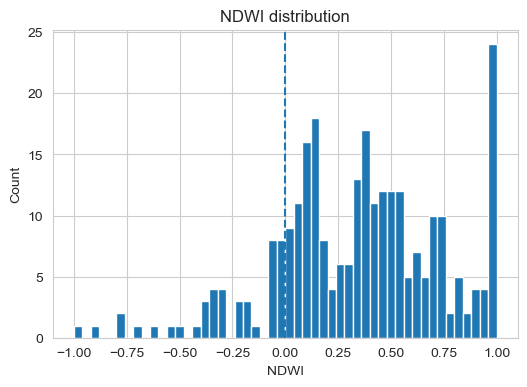

In [18]:
# NDWI 분포 시각화
plt.figure(figsize=(6, 4))
plt.hist(df_loaded["NDWI"].dropna(), bins=50)
plt.axvline(0, linestyle="--")  # water / non-water 기준선
plt.xlabel("NDWI")
plt.ylabel("Count")
plt.title("NDWI distribution")
plt.show()

In [19]:
thresholds = [-0.1, 0.0, 0.1, 0.2]

for t in thresholds:
    print(f"NDWI > {t:>4}: {(df_loaded['NDWI'] > t).sum()}")

NDWI > -0.1: 249
NDWI >  0.0: 232
NDWI >  0.1: 209
NDWI >  0.2: 171


### visualization

In [20]:
df_loaded

,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom,NDWI
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2,0.144330
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1,0.788673
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0,0.899465
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9,0.680742
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4,0.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7,0.058223
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6,0.503650
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0,0.530612
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6,0.656716


In [21]:
# 한글 폰트 불러오기
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams.update({
    "font.family": font_prop.get_name(),
    "axes.unicode_minus": False,
    "font.size": 12
})


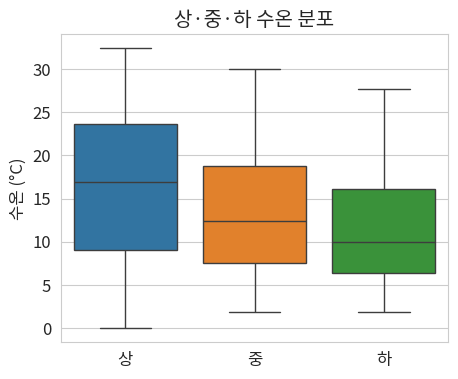

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df_loaded[["temp_surface","temp_mid","temp_bottom"]])
plt.xticks([0,1,2], ["상","중","하"])
plt.ylabel("수온 (°C)")
plt.title("상·중·하 수온 분포")
plt.show()

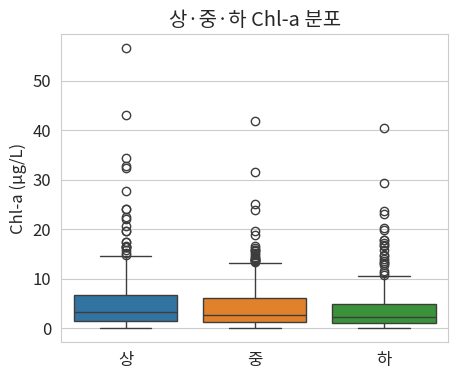

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df_loaded[["chla_surface","chla_mid","chla_bottom"]])
plt.xticks([0,1,2], ["상","중","하"])
plt.ylabel("Chl-a (µg/L)")
plt.title("상·중·하 Chl-a 분포")
plt.show()

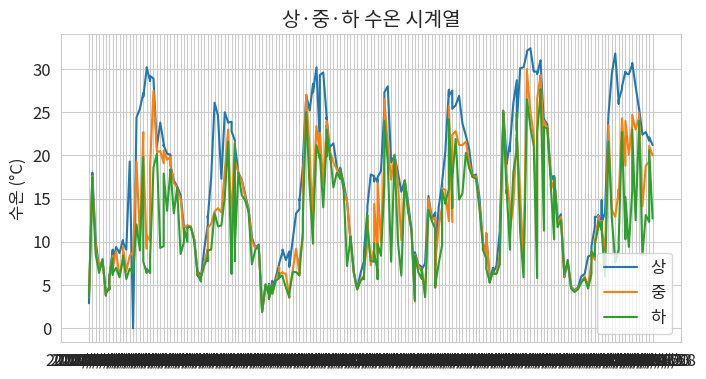

In [24]:
plt.figure(figsize=(8,4))
plt.plot(df_loaded["년/월/일"], df_loaded["temp_surface"], label="상")
plt.plot(df_loaded["년/월/일"], df_loaded["temp_mid"], label="중")
plt.plot(df_loaded["년/월/일"], df_loaded["temp_bottom"], label="하")
plt.ylabel("수온 (°C)")
plt.legend()
plt.title("상·중·하 수온 시계열")
plt.show()

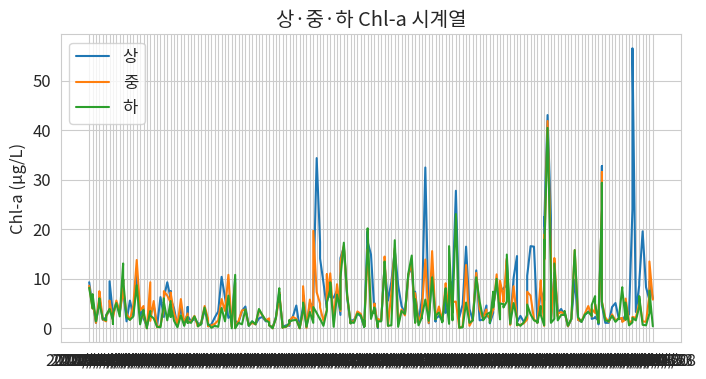

In [25]:
plt.figure(figsize=(8,4))
plt.plot(df_loaded["년/월/일"], df_loaded["chla_surface"], label="상")
plt.plot(df_loaded["년/월/일"], df_loaded["chla_mid"], label="중")
plt.plot(df_loaded["년/월/일"], df_loaded["chla_bottom"], label="하")
plt.ylabel("Chl-a (µg/L)")
plt.legend()
plt.title("상·중·하 Chl-a 시계열")
plt.show()

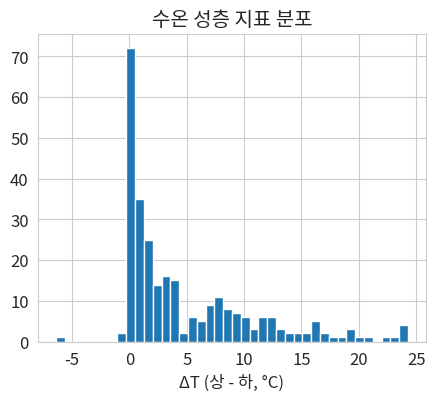

In [26]:
dT = df_loaded["temp_surface"] - df_loaded["temp_bottom"]

plt.figure(figsize=(5,4))
plt.hist(dT.dropna(), bins=40)
plt.xlabel("ΔT (상 - 하, °C)")
plt.title("수온 성층 지표 분포")
plt.show()

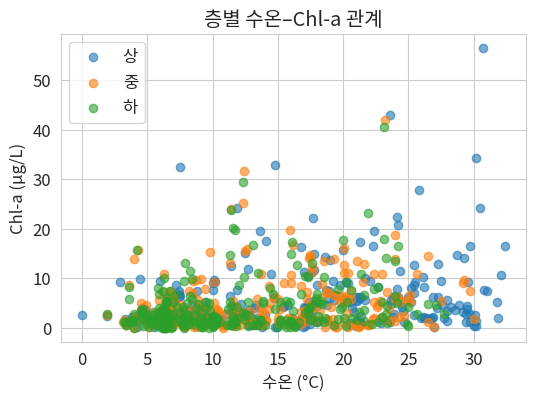

In [27]:
plt.figure(figsize=(6,4))

plt.scatter(df_loaded["temp_surface"], df_loaded["chla_surface"], alpha=0.6, label="상")
plt.scatter(df_loaded["temp_mid"], df_loaded["chla_mid"], alpha=0.6, label="중")
plt.scatter(df_loaded["temp_bottom"], df_loaded["chla_bottom"], alpha=0.6, label="하")

plt.xlabel("수온 (°C)")
plt.ylabel("Chl-a (µg/L)")
plt.legend()
plt.title("층별 수온–Chl-a 관계")
plt.show()

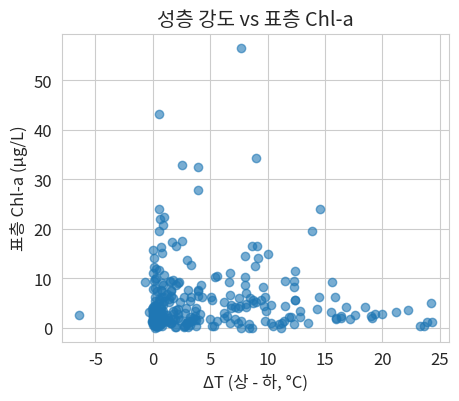

In [29]:
plt.figure(figsize=(5,4))
plt.scatter(
    df_loaded["temp_surface"] - df_loaded["temp_bottom"],
    df_loaded["chla_surface"],
    alpha=0.6
)
plt.xlabel("ΔT (상 - 하, °C)")
plt.ylabel("표층 Chl-a (µg/L)")
plt.title("성층 강도 vs 표층 Chl-a")
plt.show()

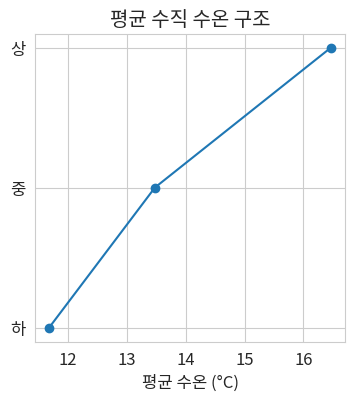

In [30]:
plt.figure(figsize=(4,4))
plt.plot(
    df_loaded[["temp_surface","temp_mid","temp_bottom"]].mean(),
    ["상","중","하"],
    marker="o"
)
plt.gca().invert_yaxis()
plt.xlabel("평균 수온 (°C)")
plt.title("평균 수직 수온 구조")
plt.show()

수직 수온 구조

In [31]:
# Layer-wise temperature distribution (boxplot)
